<h3>Exploratory analyses</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import jsonlines
from functools import reduce
import statistics
import scipy.stats
import seaborn as sns
import math
import os
import json
import ast
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod.bayes_mixed_glm import PoissonBayesMixedGLM
from statsmodels.genmod.bayes_mixed_glm import BinomialBayesMixedGLM

import pingouin as pg
import warnings
from scipy.stats import ttest_rel
#from statannotations.Annotator import Annotator
from scipy.stats import skew
from statsmodels.stats.diagnostic import het_white
from sklearn.preprocessing import PowerTransformer
import statannot
from scipy.stats import ttest_ind
import itertools
from dataclean_func import *
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.copy_on_write = True

In [2]:
task_summary=pd.read_csv('U:/Documents/Disgust learning project/github/disgust_reversal_learning-final/csvs/dem_vids_task_excluded.csv')
chosen_stim_df=pd.read_csv('U:/Documents/Disgust learning project/github/disgust_reversal_learning-final/csvs/chosen_stim_excluded.csv')

Exclude outliers

In [3]:
#create outliers df --> removing those >1.5 IQRs above or below UQ and LQ
key_outcomes=['percentage_correct', 'mean_perseverative_er', 'mean_regressive_er', 'median_till_correct', 'win_stay', 'lose_shift']
for col in key_outcomes:
    task_summary=replace_outliers_with_nan(task_summary, col)

task_summary.to_csv('U:/Documents/Disgust learning project/github/disgust_reversal_learning-final/csvs/sensitivity_df.csv')
#check for outliers - this dataframe only has one outlier in the mean regressive error outcome
task_summary[task_summary.isna().any(axis=1)]

,Unnamed: 0,percentage_correct,mean_perseverative_er,mean_regressive_er,median_till_correct,mean_till_correct,win_stay,lose_shift,timed_out,block_no,...,unspecified,digit_span,prolific_age,prolific_sex,prolific_MH,time taken,self_report_gender,self_report_assigned-at-birth,self_report_age,aligns
0,0,0.716418,1.142857,0.428571,8.0,8.428571,0.951220,0.520000,0,1.0,...,0,8.0,61,Female,No,43.616667,Female,Yes,61,True
1,1,0.875000,0.000000,0.285714,6.0,6.142857,1.000000,0.733333,0,2.0,...,0,8.0,61,Female,No,43.616667,Female,Yes,61,True
2,2,0.757143,0.714286,0.857143,10.0,9.285714,1.000000,0.739130,0,3.0,...,0,8.0,61,Female,No,43.616667,Female,Yes,61,True
3,3,0.753086,0.285714,1.714286,12.0,10.857143,0.947368,0.782609,0,2.0,...,0,6.0,52,Male,No,40.283333,Male,Yes,52,True
4,4,0.634615,1.000000,3.142857,13.0,13.428571,0.937500,0.641026,0,1.0,...,0,6.0,52,Male,No,40.283333,Male,Yes,52,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,1205,0.746269,0.571429,0.714286,7.0,8.714286,0.947368,0.500000,0,1.0,...,0,7.0,46,Male,No,41.100000,Male,Yes,46,True
1016,1208,0.535000,1.571429,NaN,17.0,25.000000,0.669811,0.483871,1,3.0,...,0,7.0,47,Female,Yes,95.150000,Female,Yes,47,True
1017,1212,0.723577,0.000000,4.000000,12.0,16.714286,0.862500,0.738095,0,3.0,...,0,9.0,64,Male,No,50.083333,Male,Yes,64,True
1018,1213,0.683333,0.714286,3.571429,13.0,15.285714,0.942029,0.780000,0,1.0,...,0,9.0,64,Male,No,50.083333,Male,Yes,64,True


<h3>Looking at overall task performance across blocks (i.e., percentage correct)</h3>

C:\Users\eb08\AppData\Local\Temp\ipykernel_26020\945127270.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=0)


Text(0.5, 1.0, 'Percentage correct')

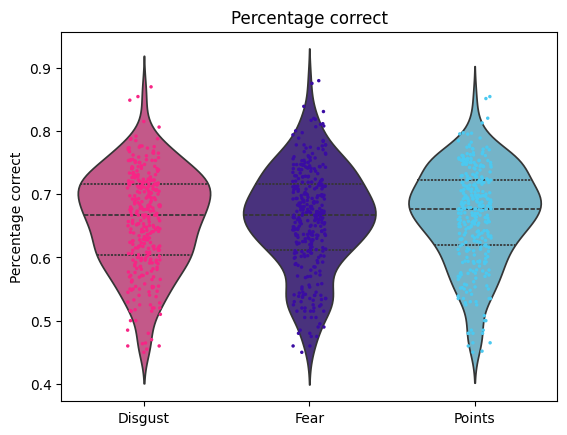

In [4]:
palette = ["#F72585", "#3A0CA3", "#4CC9F0"]

##plot hypothesised results
fig, axes = plt.subplots(1,1, sharey=False)

sns.stripplot(data=task_summary, x="block_type", y="percentage_correct", ax=axes, palette=palette, size=5, jitter=True, marker='.')
sns.violinplot(data=task_summary, x="block_type", y="percentage_correct", ax=axes,fill=True, inner="quart", palette=palette, saturation=0.5)
#axes.set_xlabel("Feedback type")
axes.set_xlabel("")
axes.set_xticklabels(axes.get_xticklabels(), rotation=0)
axes.set_ylabel("Percentage correct") 
axes.set_title("Percentage correct")

Percentage correct: -0.3715710829035457


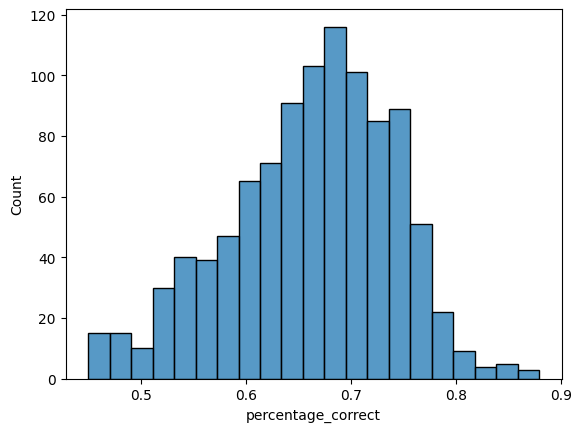

In [5]:
sns.histplot(data=task_summary, x="percentage_correct") 
print('Percentage correct: '+str(skew(task_summary.percentage_correct.dropna())))
##no skew 

<b>For completion will do model selection as done for planned analyses</b>

In [6]:
data=task_summary.reset_index()

formula = 'percentage_correct ~ block_type'

basic_model=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop').fit(reml=False)

u:\Documents\envs\disgust_reversal_venv\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<Axes: xlabel='percentage_correct_transformed', ylabel='Count'>

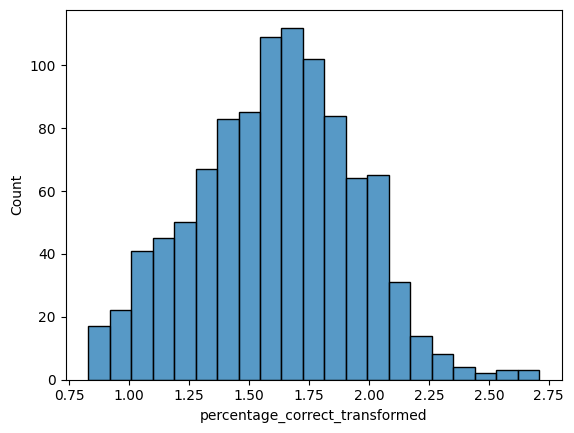

In [7]:
##because it doesn't converge will see if fixing the skew helps
pt=PowerTransformer(method='yeo-johnson', standardize=False)
skl_yeojohnson=pt.fit(pd.DataFrame(task_summary.percentage_correct))
skl_yeojohnson=pt.transform(pd.DataFrame(task_summary.percentage_correct))
task_summary['percentage_correct_transformed'] = pt.transform(pd.DataFrame(task_summary.percentage_correct))
sns.histplot(data=task_summary['percentage_correct_transformed'])

In [8]:
data=task_summary.reset_index()

formula = 'percentage_correct_transformed ~ block_type'

basic_model=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop').fit(reml=False)

Test which random effects to include (commenting out models which didn't converge)

   basic_model feedback_randint fractals_randint feedback_fractals_randint  \
0    537.28827                                                               

    randslope  feedback_randint_randslope feedback_fractals_randint_randslope  
0  564.943636                  571.862331                                      


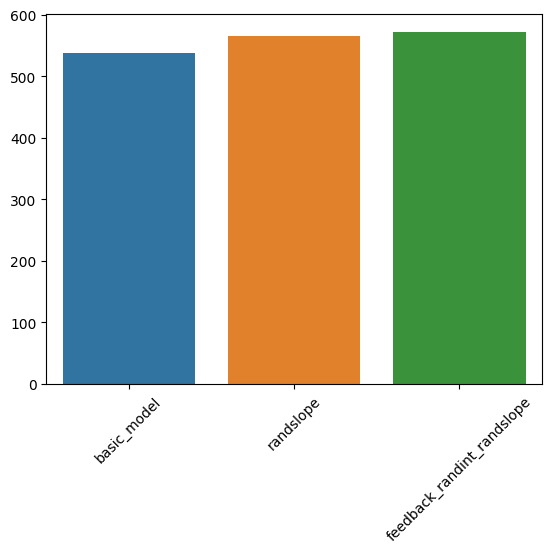

In [9]:
#test which random effects to include
#feedback_randint=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', vc_formula={'feedback_details': '0+feedback_details'}).fit(reml=False) 
#fractals_randint=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', vc_formula={'fractals': '0+fractals'}).fit(reml=False) 
#feedback_fractals_randint=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', vc_formula={"feedback_details": "0 + feedback_details", "fractals": "0 + fractals"}).fit(reml=False)

randslope=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', re_formula='~block_type').fit(reml=False)
feedback_randint_randslope=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', vc_formula={'feedback_details': '0+feedback_details'}, re_formula='~block_type').fit(reml=False) 
#feedback_fractals_randint_randslope=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop', vc_formula={'feedback_details': '0+feedback_details', "fractals": "0 + fractals"}, re_formula='~block_type').fit(reml=False) 


bic=pd.DataFrame({'basic_model': [basic_model.bic], 
                    'feedback_randint': [''], 
                    'fractals_randint': [''],
                    'feedback_fractals_randint': [''], ##added manually
                    'randslope': [randslope.bic],
                    'feedback_randint_randslope':[feedback_randint_randslope.bic],
                    'feedback_fractals_randint_randslope': ['']})
sns.barplot(bic)
plt.xticks(rotation=45) 
print(bic) ##in this case, basic model is the best

Test which covariates to add

   no_covariate  age_covariate  digit_span_covariate  sex_covariate  \
0     537.28827     539.573569            543.504239     544.194778   

   digit_span_age_covariate  sex_age_covariate  sex_digit_span_covariate  \
0                 546.21946         546.488151                550.422858   

   sex_age_digit_span_covariate  
0                    553.138152  


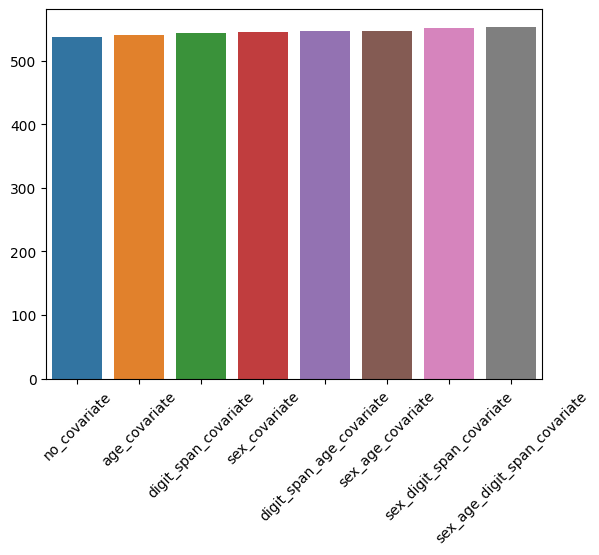

In [10]:
##test which covariates to add -- Using the random effects which were best above (basic model in this case)
no_covariate=smf.mixedlm(formula, data, groups=data['participant_no'], missing='drop').fit(reml=False)
sex_covariate=smf.mixedlm(formula+str('+prolific_sex'), data, groups=data['participant_no'], missing='drop').fit(reml=False)
age_covariate=smf.mixedlm(formula+str('+prolific_age'), data, groups=data['participant_no'], missing='drop').fit(reml=False)
digit_span_covariate=smf.mixedlm(formula+str('+digit_span'), data, groups=data['participant_no'], missing='drop').fit(reml=False)
sex_age_covariate=smf.mixedlm(formula+str('+prolific_sex+prolific_age'), data, groups=data['participant_no'], missing='drop').fit(reml=False)
sex_digit_span_covariate=smf.mixedlm(formula+str('+prolific_sex+digit_span'), data, groups=data['participant_no'], missing='drop').fit(reml=False)
digit_span_age_covariate=smf.mixedlm(formula+str('+digit_span+prolific_age'), data, groups=data['participant_no'], missing='drop').fit(reml=False)
sex_age_digit_span_covariate=smf.mixedlm(formula+str('+prolific_sex+prolific_age+digit_span'), data, groups=data['participant_no'], missing='drop').fit(reml=False)

bic=pd.DataFrame({'no_covariate': [no_covariate.bic], 
                    'sex_covariate': [sex_covariate.bic], 
                    'age_covariate': [age_covariate.bic],
                    'digit_span_covariate': [digit_span_covariate.bic],
                    'sex_age_covariate': [sex_age_covariate.bic],
                    'sex_digit_span_covariate': [sex_digit_span_covariate.bic],
                    'digit_span_age_covariate': [digit_span_age_covariate.bic],
                    'sex_age_digit_span_covariate': [sex_age_digit_span_covariate.bic]})
plt.xticks(rotation=45)
sns.barplot(bic.sort_values(by=0, axis=1))
print(bic.sort_values(by=0, axis=1))  ##in this case, nocovariate is the best

<b>Now use that best fitting model for hypothesis testing </b>

In [11]:
#Hypothesis test using this model (and if no covariate model hadn't won - would run this too)
no_covariate.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Mixed Linear Model Regression Results
============================================================================
Model:            MixedLM Dependent Variable: percentage_correct_transformed
No. Observations: 1011    Method:             ML                            
No. Groups:       340     Scale:              0.0664                        
Min. group size:  1       Log-Likelihood:     -251.3474                     
Max. group size:  3       Converged:          Yes                           
Mean group size:  3.0                                                       
------------------------------------------------------------------------------
                           Coef.   Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------------------
Intercept                  1.591      0.018   87.402   0.000    1.555    1.626
block_type[T.Fear]         0.013      0.020    0.660   0.509   -0.026    0.052
block_type[T.Points]       0.035      0.020    1.743   0.081   -0.004    0.074
Group Var                  0.045      0.025                                   
============================================================================

"""

Test the assumptions of this model

In [12]:
#chosen model
results=no_covariate

#shapiro-Wilk test of normality of residuals
labels = ["Statistic", "p-value"]
norm_res = stats.shapiro(results.resid)

for key, val in dict(zip(labels, norm_res)).items():
    print(key, val)
    ##if test is significant then the assumption is violated
        #is significant here

##homoskedasticity of variance - commented out due to an error
#White Lagrange Multiplier Test for Heteroscedasticity
#het_white_res = het_white(results.resid, results.model.exog)

#labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]

#for key, val in dict(zip(labels, het_white_res)).items():
    #print(key, val)
    ##again, only violated if you get a significant p value

Statistic 0.995500372664794
p-value 0.004542012385831054


Normality of residuals is violated - so need a generalized mixed effects model
<p>see percentage_correct_sensitivity.ipynb in the exploratory_generalized_mixed effects_model folder
<p>this model finds <b>no effect of block-type</b>. So we can be confident that the decrease in lose-shift is not due to an overall change in task performance on the disgust-block (e.g., due to inattention or increased distraction)

<p>We can test our certainty of this using a Bayes factor</p>

In [13]:
##Bayes factor analysis
def bayes_factor(df, dependent_var, condition_1_name, condition_2_name):
    df=df[(df.block_type==condition_1_name)| (df.block_type==condition_2_name)][[dependent_var, 'block_type', 'participant_no']]
    df.dropna(inplace=True)
    df=df.pivot(index='participant_no', columns='block_type', values=dependent_var).reset_index()
    ttest=pg.ttest(df[condition_1_name], df[condition_2_name], paired=True)
    bf_null=1/float(ttest.BF10)
    return bf_null

In [14]:
bayes_factor(task_summary, 'percentage_correct', 'Disgust', 'Points')
#effect size of 4 suggests moderate support for the null

4.424778761061947

<h3>Assessing the effect of video ratings on lose-shift result</h3>
<p>Lose-shift result doesn't need to be re-run because lose-shift has no outliers

In [15]:
###lose shift has no outliers - so a sensitivity analysis is not necessary
print("Number of lose-shift outliers: "+str(len(task_summary[task_summary.lose_shift.isna()])))

Number of lose-shift outliers: 0
